In [83]:
import pandas as pd
import os
import pathlib
import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'resizeimage'

In [70]:
TRAINING_CSV_PATH = 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv'
IMAGE_WIDTH = 30 

IMAGE_HEIGHT = IMAGE_WIDTH  

In [47]:
img =  Image.open('C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00000_00000.ppm')

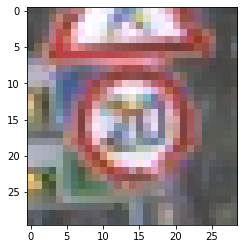

In [48]:
plt.imshow(img)

In [49]:
[c for c in glob.glob('C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv')]

['C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\GT-00000.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00001\\GT-00001.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00002\\GT-00002.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00003\\GT-00003.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00004\\GT-00004.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00005\\GT-00005.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00006\\GT-00006.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00007\\GT-00007.csv',
 'C:/Users/b16023743/Downloads/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00008\\GT-00008.csv',
 'C:/Users

In [77]:
def  build_images_database(path):
    """Build a pandas DataFrame with all images formation
    
    Parameters
    ----------
    path : path pattern to read csv files containing images information
    
    Return
    
    ----------
    A pandas DataFraùme with one line per image
    
    """
    df_list = []
    for filename in glob.glob(path):
        df = pd.read_csv(filename, sep = ';')
        df['path'] = os.path.dirname(filename) + '/' + df['Filename']
        df_list.append(df)
    return pd.concat(df_list, ignore_index = True)


def build_images_list(filename_list):
    """Build a list of images as Numpy array
    """
    for filename in filename_list:
        image = Image.open(filename)
        image = Image.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        image = np.array(image)
        images_list.append(image)
        
    return images_list

In [78]:
images_df = build_images_database(TRAINING_CSV_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,C:/Users/b16023743/Downloads/GTSRB_Final_Train...
1,00000_00001.ppm,30,30,5,5,25,25,0,C:/Users/b16023743/Downloads/GTSRB_Final_Train...
2,00000_00002.ppm,30,30,5,5,25,25,0,C:/Users/b16023743/Downloads/GTSRB_Final_Train...
3,00000_00003.ppm,31,31,5,5,26,26,0,C:/Users/b16023743/Downloads/GTSRB_Final_Train...
4,00000_00004.ppm,30,32,5,6,25,26,0,C:/Users/b16023743/Downloads/GTSRB_Final_Train...


In [53]:
images_df['Width'].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
183       1
173       1
162       1
229       1
226       1
Name: Width, Length: 187, dtype: int64

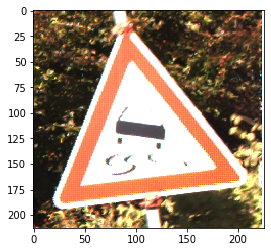

In [79]:
plt.imshow(Image.open(images_df.query('Width == 226')['path'].values[0]))

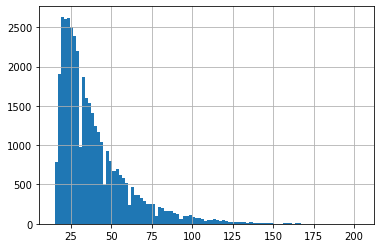

In [80]:
(images_df['Roi.X2'] - images_df['Roi.X1']).hist(bins =100);

In [81]:
(images_df['Roi.X2'] - images_df['Roi.X1']).median()

33.0

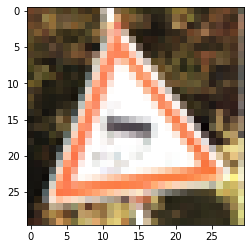

In [88]:
plt.imshow(Image.open(images_df.query('Width == 226')['path'].values[0]).resize((30, 30)))